In [1]:
from jax.lib import xla_bridge
print(xla_bridge.get_backend().platform)

gpu


In [ ]:
%pylab inline
%load_ext autoreload
%autoreload 2
from functools import partial
import jax
from numpyro.handlers import seed, condition
from sbi_lens.simulator import lensingLogNormal

import logging
logger = logging.getLogger()
class CheckTypesFilter(logging.Filter):
    def filter(self, record):
        return "check_types" not in record.getMessage()
logger.addFilter(CheckTypesFilter())
'unset XLA_FLAGS'
import cmasher as cmr

Populating the interactive namespace from numpy and matplotlib


2023-09-23 12:58:10.205385: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/gpfslocalsup/pub/anaconda-py3/2021.05/envs/tensorflow-2.7.0+py3.9/lib/python3.9/site-packages/requests/__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.15) or chardet (5.1.0)/charset_normalizer (2.0.8) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


## Create fiducial and plot results

In [ ]:
model = partial(lensingLogNormal,
                model_type='lognormal',
                with_noise=False)

# condition the model on a given set of parameters
fiducial_model = condition(model, {'omega_c': 0.2664, 
                                   'omega_b': 0.0492,
                                   'sigma_8': 0.831,
                                   'h_0': 0.6727,
                                   'n_s': 0.9645,
                                   'w_0': -1.0})

# sample a mass map
sample_map_fiducial = seed(fiducial_model, jax.random.PRNGKey(42))
m_data = sample_map_fiducial()


In [4]:
theta_max=10
EXTENT = (-0.5 * theta_max, 0.5 * theta_max, -0.5 * theta_max, 0.5 * theta_max)
cmap = cmr.eclipse

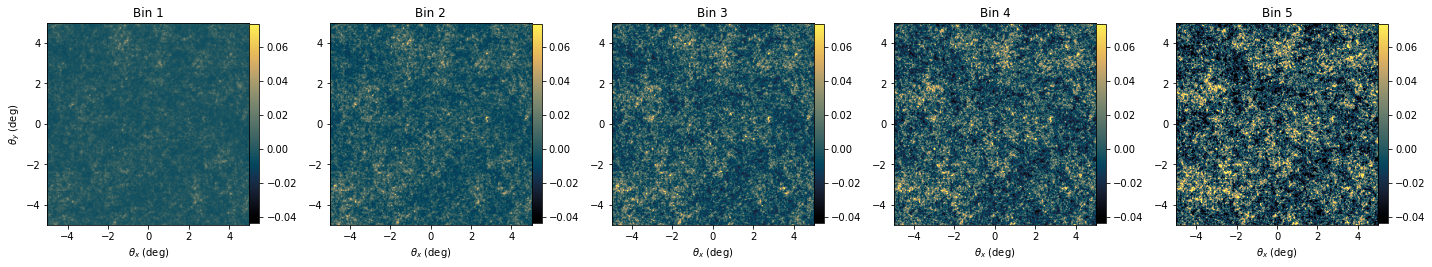

In [5]:

n_nz_bins=5
fig, ax = plt.subplots(1,n_nz_bins, figsize=(4 * n_nz_bins, 7))
for i in range(n_nz_bins):
    std_kmap = np.std(m_data[...,-1])
    ax[i].set_title('Bin %d'%(i+1))
    ax[i].set_xlabel(r'$\theta_x$ (deg)')
    ax[i].imshow(m_data[...,i], cmap=cmap, vmin = -1.5 * std_kmap, vmax = 2.5 * std_kmap, extent=EXTENT)
    cb = fig.colorbar(ax[i].imshow(m_data[...,i], cmap=cmap, vmin = -1.5 * std_kmap, vmax = 2.5 * std_kmap, extent=EXTENT) ,fraction=0.047, pad=0.)
    cb.ax.tick_params(labelsize=10)
ax[0].set_ylabel(r'$\theta_y$ (deg)')
plt.tight_layout()
plt.show()

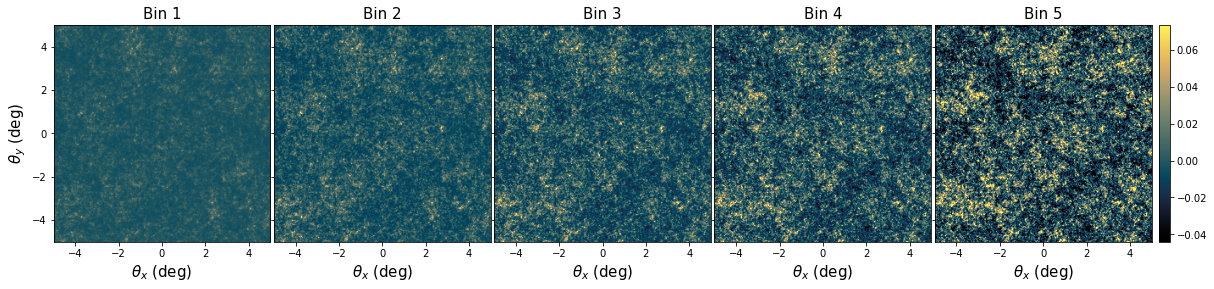

In [7]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import AxesGrid
import numpy as np

fig = plt.figure(figsize=(4 * n_nz_bins, 7))
std_kmap = np.std(m_data[...,-1])
grid = AxesGrid(fig, 111,
                nrows_ncols=(1, 5),
                axes_pad=0.05,
                cbar_mode='single',
                cbar_location='right',
                cbar_pad=0.1
                )

for ax,i in zip(grid,range(n_nz_bins)):
    im = ax.imshow(m_data[...,i],cmap=cmap, vmin = -1.5 * std_kmap, vmax = 2.5 * std_kmap, extent=EXTENT)
    ax.set_title('Bin %d'%(i+1),fontsize=15)
    ax.set_xlabel(r'$\theta_x$ (deg)',fontsize=15)
   
grid[0].set_ylabel(r'$\theta_y$ (deg)',fontsize=15)
cbar = ax.cax.colorbar(ax.imshow(m_data[...,-1], cmap=cmap, vmin = -1.5 * std_kmap, vmax = 2.5 * std_kmap, extent=EXTENT) ,fraction=0.050, pad=0.)
cbar = grid.cbar_axes[0].colorbar(ax.imshow(m_data[...,-1], cmap=cmap, vmin = -1.5 * std_kmap, vmax = 2.5 * std_kmap, extent=EXTENT) ,fraction=0.050, pad=0.)
plt.savefig('../figures/example_kmaps.pdf',  transparent = True)